In [1]:
import os
os.chdir('../')
from python_code import gibbs_sampler as gs
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.style as style
plt.rcParams.update({'axes.labelsize':16})
plt.rcParams.update({'axes.titlesize':16})
plt.rcParams.update({'legend.fontsize':16})
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['lines.linewidth'] = 4
style.use('ggplot')
from scipy.stats import t
from scipy import stats

In [2]:
df = pd.read_csv('../data/bloodpressure.csv')
df.columns = ['_', 'values', 'subject', 'group']

In [3]:
group_1 = df[df['group'] == 1]['values']
group_2 = df[df['group'] == 2]['values']

In [4]:
alpha = 0.05
s_squared = ((len(group_1)-1)*group_1.var() + (len(group_2)-1) * group_2.var())/(len(group_1)+len(group_2)-2)
dist = t(loc=0, scale=np.sqrt(s_squared)*np.sqrt(1/len(group_1) + 1/len(group_2)), df=len(group_1)+len(group_2)-2)

In [5]:
np.sqrt(s_squared)*np.sqrt(1/len(group_1) + 1/len(group_2))

1.0018725995897495

In [6]:
p_value = dist.cdf(group_2.mean() - group_1.mean())*2
p_value

2.29735313852906e-19

In [7]:
stats.ttest_ind(group_1, group_2, equal_var=True, alternative='two-sided')

Ttest_indResult(statistic=9.451231419610627, pvalue=2.29735313852906e-19)

In [8]:
new_group_1 = df[df['group'] == 1].groupby('subject')['values'].mean()
new_group_2 = df[df['group'] == 2].groupby('subject')['values'].mean()

In [9]:
stats.ttest_ind(group_1, group_2, equal_var=True, alternative='two-sided')

Ttest_indResult(statistic=9.451231419610627, pvalue=2.29735313852906e-19)

In [10]:
s_squared = ((len(new_group_1)-1)*new_group_1.var() + (len(new_group_2)-1) * new_group_2.var())/(len(new_group_1)+len(new_group_2)-2)
np.sqrt(s_squared)*np.sqrt(1/len(new_group_1) + 1/len(new_group_2))

4.5117616198060375

In [11]:
df.groupby('group').groups.keys()

dict_keys([1, 2])

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:04<00:00, 1141.84it/s]


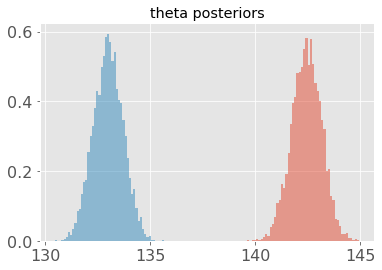

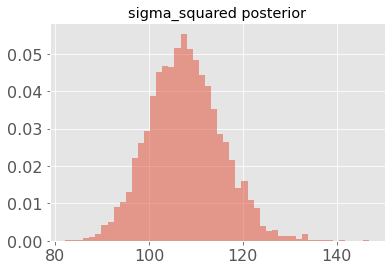

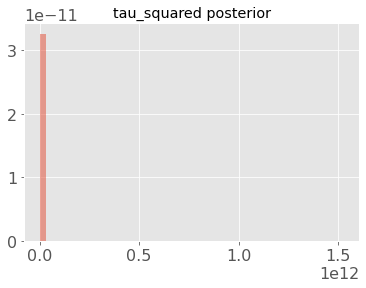

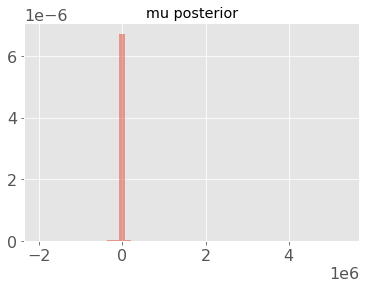

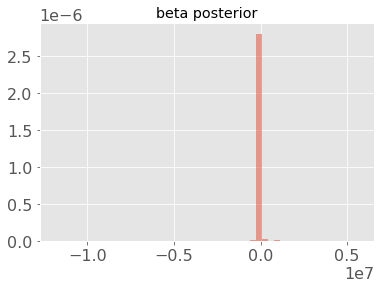

<Figure size 432x288 with 0 Axes>

In [12]:
gibbs = gs.GibbsSamplerBeta(df[['group', 'values']],beta=1, n_iter=5000, burn=100)
gibbs.fit()
gibbs.plot_all_posteriors()